<a href="https://colab.research.google.com/github/DISHANTJOSHI1/dishant_data690/blob/main/assignment_05/part_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05 Part 03
- Name: Dishant Fapot
- Date: 03/05/2022


#What is a Jupyter Notebook?

The Jupyter Notebook is an open-source web application that allows data scientists to create and share documents that integrate live code, equations, computational output, visualizations, and other multimedia resources, along with explanatory text in a single document.

Import Libraries

In [4]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
x = np.linspace(0, 10, 500) # Return evenly spaced numbers 
y = np.cumsum(np.random.randn(500, 6), 0) #cumulative sum of array elements

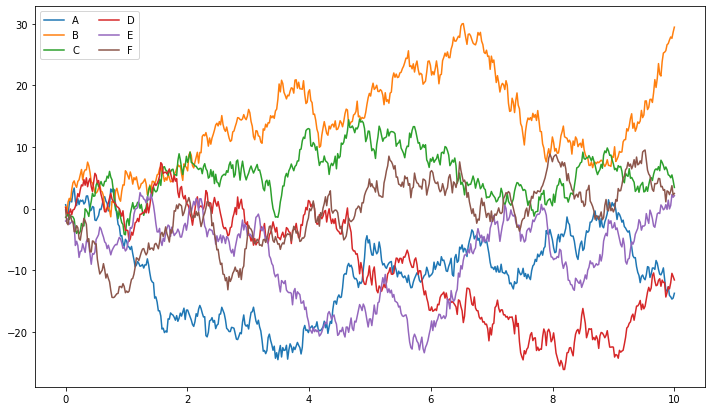

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [5]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [6]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-27 03:30:21.090914')

In [27]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [11]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [13]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-27 04:00:00,38568.58,38714.84,38557.26,38637.49,18.114466,7.001259e+05
2022-02-27 05:00:00,38637.15,38694.83,38500.56,38593.13,10.271630,3.965473e+05
2022-02-27 06:00:00,38579.76,38772.01,38482.91,38620.12,14.831298,5.736353e+05
2022-02-27 07:00:00,38648.04,38888.88,38646.67,38814.82,27.119317,1.051880e+06
2022-02-27 08:00:00,38814.81,38901.10,38789.91,38837.37,4.595978,1.785289e+05


In [15]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,41305.882544,41546.167337,41058.578166,41313.850355,90.722275,3.779871e+06
std,2273.941700,2296.432500,2255.164527,2269.178447,93.260180,3.936612e+06
min,37408.050000,37824.480000,37015.740000,37410.010000,4.272595,1.686451e+05
25%,39100.840000,39216.500000,38943.610000,39122.010000,28.543431,1.182265e+06
50%,41441.610000,41558.950000,41251.380000,41439.510000,53.465534,2.250032e+06
75%,43536.140000,43859.520000,43333.000000,43564.730000,112.331332,4.576964e+06
max,44858.140000,45332.380000,44454.990000,44822.340000,527.540571,2.270716e+07


In [16]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-27 04:00:00,2711.26,2729.59,2711.26,2720.40,276.287461,7.512221e+05
2022-02-27 05:00:00,2714.18,2721.75,2703.00,2707.97,82.094881,2.226362e+05
2022-02-27 06:00:00,2708.16,2723.26,2699.81,2714.03,80.871043,2.195674e+05
2022-02-27 07:00:00,2710.55,2737.77,2710.55,2734.87,729.171686,1.986249e+06
2022-02-27 08:00:00,2735.17,2746.18,2735.17,2740.02,303.271282,8.310790e+05


In [17]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,2793.711302,2811.734497,2773.903905,2793.725858,504.610457,1.418010e+06
std,134.737364,136.992220,132.514757,134.865966,436.319158,1.221214e+06
min,2593.600000,2616.830000,2558.900000,2595.000000,18.214868,4.861574e+04
25%,2660.010000,2672.290000,2648.400000,2660.250000,193.174112,5.470983e+05
50%,2802.550000,2818.750000,2760.710000,2801.830000,369.620595,1.086520e+06
75%,2923.690000,2935.710000,2906.290000,2925.000000,645.116574,1.861011e+06
max,3020.000000,3045.710000,2991.440000,3020.540000,2283.844474,6.377381e+06


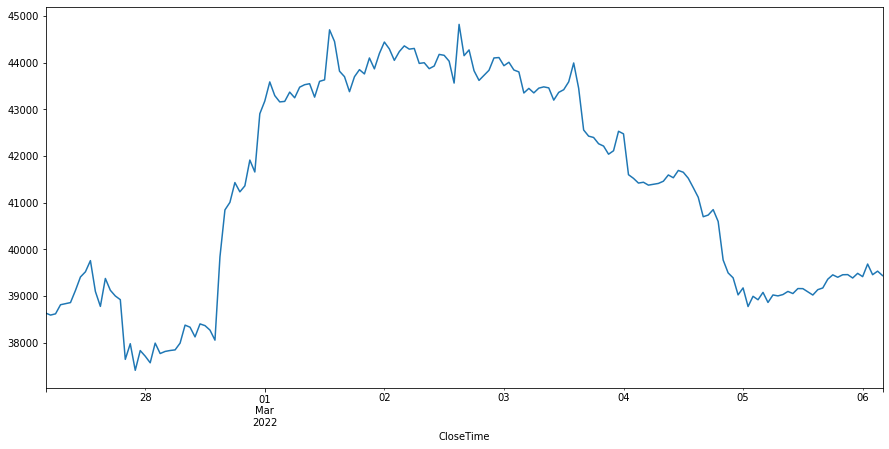

In [18]:
btc['ClosePrice'].plot(figsize=(15, 7))

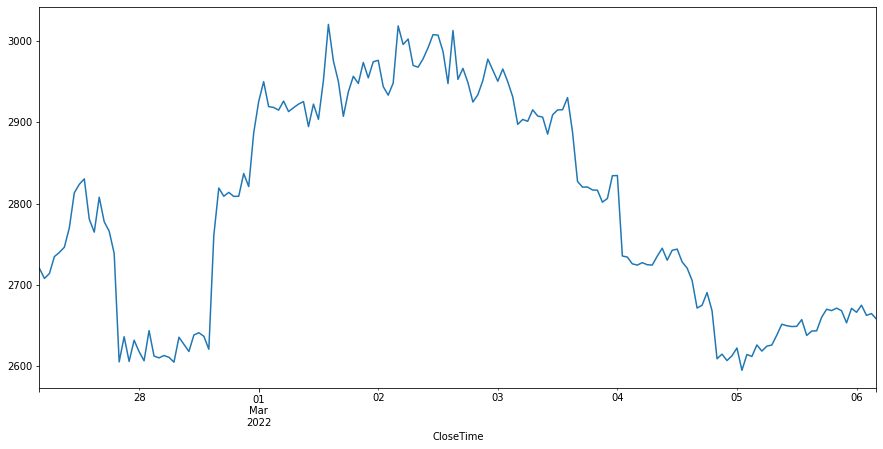

In [19]:
eth['ClosePrice'].plot(figsize=(15, 7))

Bonus: Dynamic plots with Bokeh (Interactive Plots)


In [20]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

In [21]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'
p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
p1.legend.location = "top_left"
show(p1)

Export to Excel

In [22]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [23]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [24]:
eth.to_excel(writer, sheet_name='Ether')

In [25]:
writer.save()